In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files


uploaded = files.upload()

Saving emails.csv to emails.csv


In [3]:
import pandas as pd
import io

df = pd.read_csv('Datasets/emails.csv')

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
df.shape

(5172, 3002)

In [11]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

def report(classifier, x_test, y_test):
    y_pred = classifier.predict(x_test)
    y_pred_proba = classifier.predict_proba(x_test)[:, 1]

    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision Score:  {precision_score(y_test, y_pred):.2f}")
    print(f"Recall Score:  {recall_score(y_test, y_pred):.2f}")

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title("Confusion Matrix")
    axes[0].set_xlabel("Predicted Labels")
    axes[0].set_ylabel("True Labels")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    axes[1].plot(recall, precision, marker='.', color='orange')
    axes[1].set_title("Precision-Recall Curve")
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    axes[2].plot(fpr, tpr, marker='.', color='blue')
    axes[2].set_title("ROC Curve")
    axes[2].set_xlabel("False Positive Rate")
    axes[2].set_ylabel("True Positive Rate")

    auc = roc_auc_score(y_test, y_pred_proba)
    print('AUC score = ', auc)

    optimal_idx = np.argmax(tpr-fpr)
    optimal_threshold = thresholds[optimal_idx]
    print('Optimal Threshold = ', optimal_threshold)

    # Display all subplots  
    plt.tight_layout()
    plt.show()

Accuracy:  0.84
Precision Score:  0.65
Recall Score:  0.97


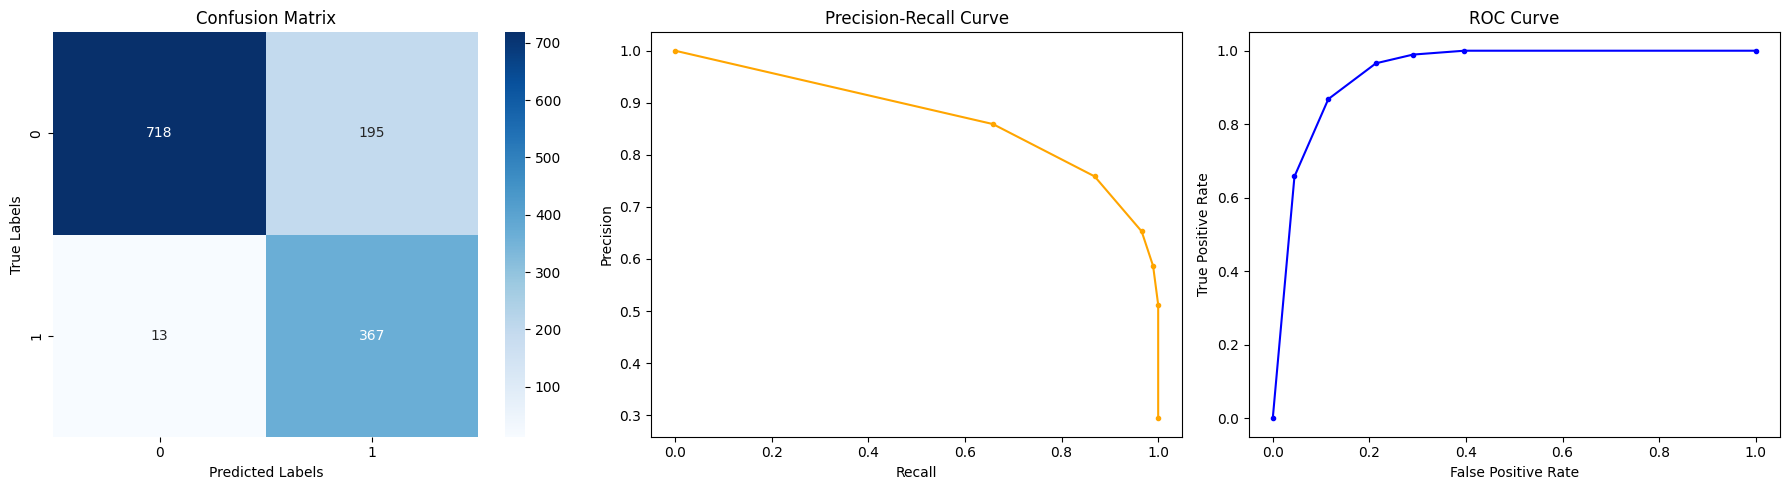

In [50]:
report(knn, x_test=X_test, y_test=y_test)

In [19]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

Accuracy:  0.96
Precision Score:  0.92
Recall Score:  0.96


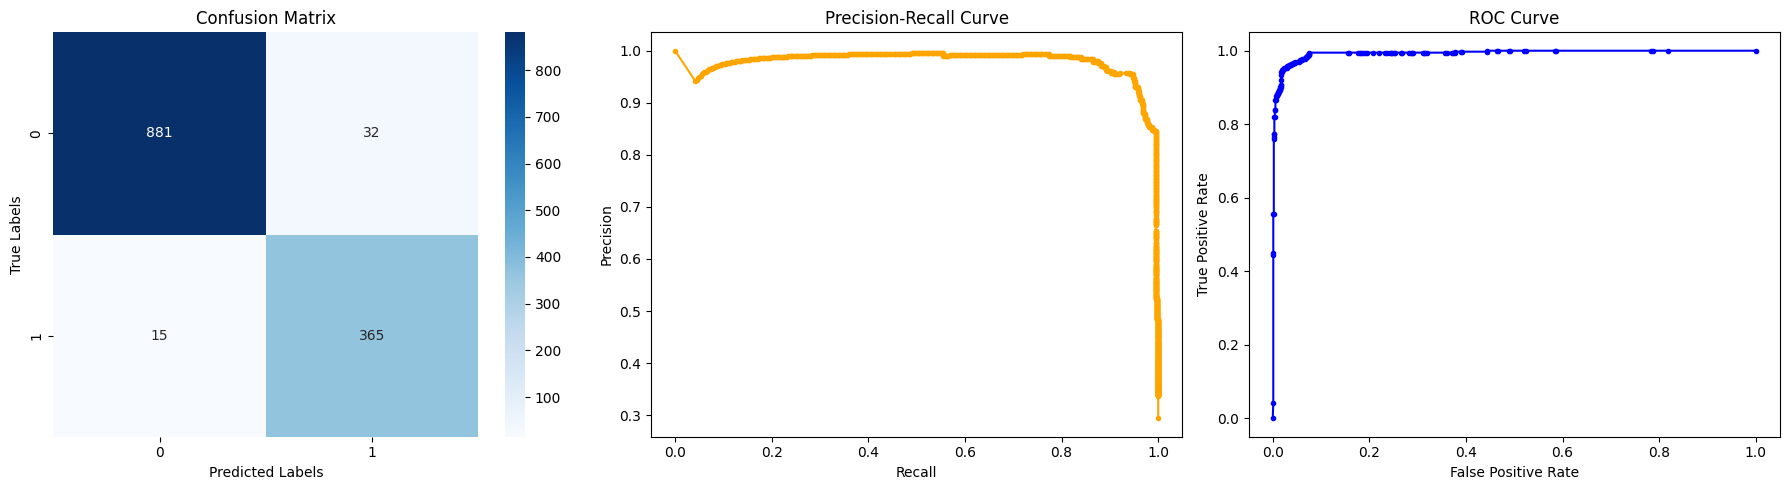

In [20]:
report(svc, x_test=X_test, y_test=y_test)